

## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [1]:
import pandas as pd
from pathlib import Path
%matplotlib inline

## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [2]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
bitstamp = pd.read_csv(
    Path("bitstamp.csv"),
    index_col="Timestamp",
    parse_dates=True,
    infer_datetime_format=True
    )


### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [3]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
bitstamp.head()
bitstamp.tail()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-03-31 23:55:00,6935.01,6939.07,6922.56,$6922.56,1.044354,7240.034602,6932.550078
2018-03-31 23:56:00,6922.02,6922.02,6918.00,$6920.32,3.069539,21245.076275,6921.260233
2018-03-31 23:57:00,6920.33,6936.42,6920.33,$6934.72,28.239049,195789.408220,6933.286106
2018-03-31 23:58:00,6927.65,6929.42,6927.65,$6927.65,0.839507,5817.007705,6929.080007
2018-03-31 23:59:00,6929.98,6929.98,6928.00,$6928.01,0.209363,1450.735763,6929.289993


### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [4]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
coinbase = pd.read_csv(
Path("coinbase.csv"),
    index_col=("Timestamp"),
    parse_dates=True,
    infer_datetime_format=True
)

In [5]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
coinbase.head(2880)

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,$13608.49,20.812754,283451.085370,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.978010,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,$13580.0,11.536360,156789.196860,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,$13550.34,16.328039,221413.641820,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,$13583.44,9.955364,135141.269440,13574.719401
...,...,...,...,...,...,...,...
2018-01-02 23:55:00,15147.99,15148.00,15147.01,$15147.02,13.405442,203063.641300,15147.851529
2018-01-02 23:56:00,15147.01,15147.01,15139.99,$15139.99,7.984179,120906.559460,15143.266973
2018-01-02 23:57:00,15139.99,15139.99,15110.02,$15110.02,17.356708,262480.835930,15122.731294


## Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [6]:
bitstamp.dropna

<bound method DataFrame.dropna of                          Open      High       Low      Close  BTC Volume  \
Timestamp                                                                  
2018-01-01 00:00:00  13681.04  13681.04  13637.93  $13646.48    3.334553   
2018-01-01 00:01:00  13646.48  13658.75  13610.18  $13658.75    2.663188   
2018-01-01 00:02:00  13616.93  13616.93  13610.06  $13610.22    0.084653   
2018-01-01 00:03:00  13610.27  13639.09  13610.27  $13639.09    7.182986   
2018-01-01 00:04:00  13635.35  13636.35  13620.00   $13620.0    1.069665   
...                       ...       ...       ...        ...         ...   
2018-03-31 23:55:00   6935.01   6939.07   6922.56   $6922.56    1.044354   
2018-03-31 23:56:00   6922.02   6922.02   6918.00   $6920.32    3.069539   
2018-03-31 23:57:00   6920.33   6936.42   6920.33   $6934.72   28.239049   
2018-03-31 23:58:00   6927.65   6929.42   6927.65   $6927.65    0.839507   
2018-03-31 23:59:00   6929.98   6929.98   6928.00   $6

### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [7]:
# Use the str.replace function to remove the dollar sign, $
bitstamp.loc[:, "Close"] = bitstamp.loc[:, "Close"].str.replace("$", "")

### Step 3: Convert the data type of the Close column to a `float`.

In [8]:
# Convert the Close data type to a float
bitstamp.loc[:, "Close"] = bitstamp.loc[:, "Close"].astype("float")

### Step 4: Review the data for duplicated values, and drop them if necessary.

In [9]:
# Review the data for duplicate values, and drop them if necessary
bitstamp.duplicated().sum()

472

### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [10]:
coinbase.dropna

<bound method DataFrame.dropna of                          Open      High       Low      Close  BTC Volume  \
Timestamp                                                                  
2018-01-01 00:00:00  13620.00  13620.00  13608.49  $13608.49   20.812754   
2018-01-01 00:01:00  13607.14  13607.14  13601.66  $13601.66   13.474359   
2018-01-01 00:02:00  13601.44  13601.44  13580.00   $13580.0   11.536360   
2018-01-01 00:03:00  13587.31  13587.31  13542.70  $13550.34   16.328039   
2018-01-01 00:04:00  13550.34  13585.95  13550.34  $13583.44    9.955364   
...                       ...       ...       ...        ...         ...   
2018-03-31 23:55:00   6945.20   6948.06   6930.00    $6930.0    5.802288   
2018-03-31 23:56:00   6930.00   6930.01   6930.00   $6930.01    0.625053   
2018-03-31 23:57:00   6930.01   6933.91   6930.01   $6933.91    0.776431   
2018-03-31 23:58:00   6933.91   6938.00   6933.90   $6937.31    0.133413   
2018-03-31 23:59:00   6937.30   6937.30   6931.09    $

In [11]:
coinbase.dropna

<bound method DataFrame.dropna of                          Open      High       Low      Close  BTC Volume  \
Timestamp                                                                  
2018-01-01 00:00:00  13620.00  13620.00  13608.49  $13608.49   20.812754   
2018-01-01 00:01:00  13607.14  13607.14  13601.66  $13601.66   13.474359   
2018-01-01 00:02:00  13601.44  13601.44  13580.00   $13580.0   11.536360   
2018-01-01 00:03:00  13587.31  13587.31  13542.70  $13550.34   16.328039   
2018-01-01 00:04:00  13550.34  13585.95  13550.34  $13583.44    9.955364   
...                       ...       ...       ...        ...         ...   
2018-03-31 23:55:00   6945.20   6948.06   6930.00    $6930.0    5.802288   
2018-03-31 23:56:00   6930.00   6930.01   6930.00   $6930.01    0.625053   
2018-03-31 23:57:00   6930.01   6933.91   6930.01   $6933.91    0.776431   
2018-03-31 23:58:00   6933.91   6938.00   6933.90   $6937.31    0.133413   
2018-03-31 23:59:00   6937.30   6937.30   6931.09    $

In [12]:
# Repeat Steps 1–4 for the coinbase DataFram

coinbase.loc[:, "Close"] = coinbase.loc[:, "Close"].str.replace("$","")


In [13]:
coinbase.loc[:, "Close"] = coinbase.loc[:, "Close"].astype("float")

In [14]:
coinbase.duplicated().sum()

217

## Analyze the Data

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [15]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
bitstamp_sliced = bitstamp.iloc[:,[3]]

# Review the first five rows of the DataFrame
bitstamp_sliced.head()

,Close
Timestamp,
2018-01-01 00:00:00,13646.48
2018-01-01 00:01:00,13658.75
2018-01-01 00:02:00,13610.22
2018-01-01 00:03:00,13639.09
2018-01-01 00:04:00,13620.00


In [16]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
coinbase_sliced = coinbase.iloc[:,[3]]

# Review the first fve rows of the DataFrame
coinbase_sliced.head()

,Close
Timestamp,
2018-01-01 00:00:00,13608.49
2018-01-01 00:01:00,13601.66
2018-01-01 00:02:00,13580.00
2018-01-01 00:03:00,13550.34
2018-01-01 00:04:00,13583.44


### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [17]:
# Generate the summary statistics for the bitstamp DataFrame
bitstamp.describe()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
count,129067.000000,129067.000000,129067.000000,129067.000000,129067.000000,1.290670e+05,129067.000000
mean,10459.993683,10472.970114,10446.214703,10459.842453,11.792878,1.177496e+05,10459.384448
std,2315.909269,2318.929342,2312.331601,2315.976088,21.799938,2.070551e+05,2315.723480
min,5945.950000,5975.060000,5920.720000,5944.000000,0.000039,3.333436e-01,5949.997212
25%,8613.985000,8621.655000,8604.440000,8613.370000,1.711874,1.773244e+04,8613.587020
50%,10145.300000,10156.410000,10131.740000,10145.950000,4.994095,5.188050e+04,10144.740411
75%,11444.455000,11453.990000,11431.970000,11444.810000,12.717950,1.313104e+05,11443.791560
max,17234.980000,17234.990000,17214.960000,17234.980000,580.646391,5.483271e+06,17227.810502


In [18]:
# Generate the summary statistics for the coinbase DataFrame
coinbase.describe()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
count,129322.000000,129322.000000,129322.000000,129322.000000,129322.000000,1.293220e+05,129322.000000
mean,10449.213185,10456.118514,10441.872248,10449.140958,15.666556,1.572565e+05,10448.964130
std,2317.194653,2317.710389,2316.570594,2317.197419,27.481647,2.667879e+05,2317.167139
min,5882.300000,5907.280000,5873.000000,5882.310000,0.000442,6.699174e+00,5883.394912
25%,8609.230000,8613.872500,8603.505000,8609.230000,2.999125,3.071222e+04,8609.135020
50%,10137.440000,10145.900000,10127.880000,10137.440000,7.092572,7.461366e+04,10136.035004
75%,11397.522500,11400.000000,11390.000000,11397.237500,16.954279,1.754530e+05,11396.970843
max,17178.000000,17178.000000,17177.990000,17177.990000,959.084903,1.152334e+07,17177.995495


<AxesSubplot:title={'center':'Bitstamp BTC pricing-1st Quarter 2018'}, xlabel='Timestamp'>

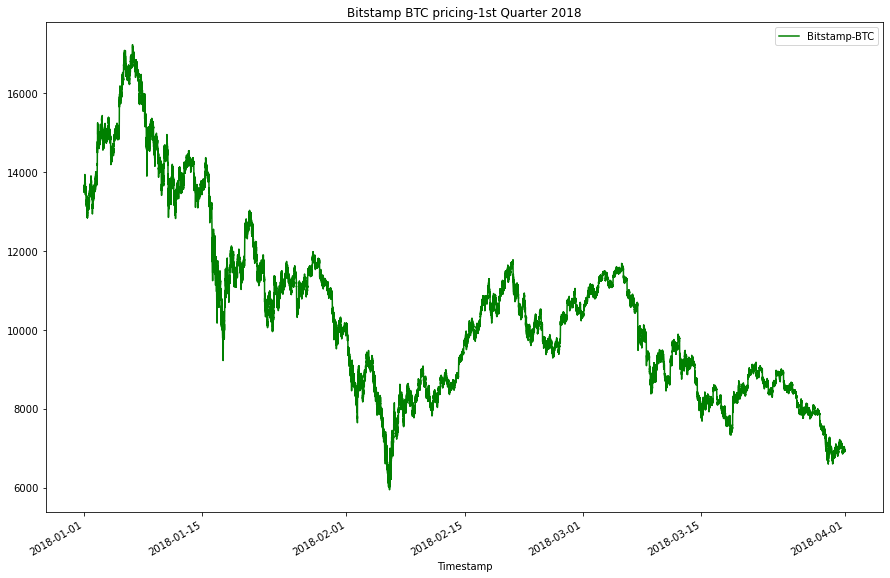

In [19]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
bitstamp['Close'].plot(legend=True, figsize=(15, 10), title="Bitstamp BTC pricing-1st Quarter 2018", color="green", label="Bitstamp-BTC")  
                       

<AxesSubplot:title={'center':'Coinbase BTC pricing-1st Quarter 2018'}, xlabel='Timestamp'>

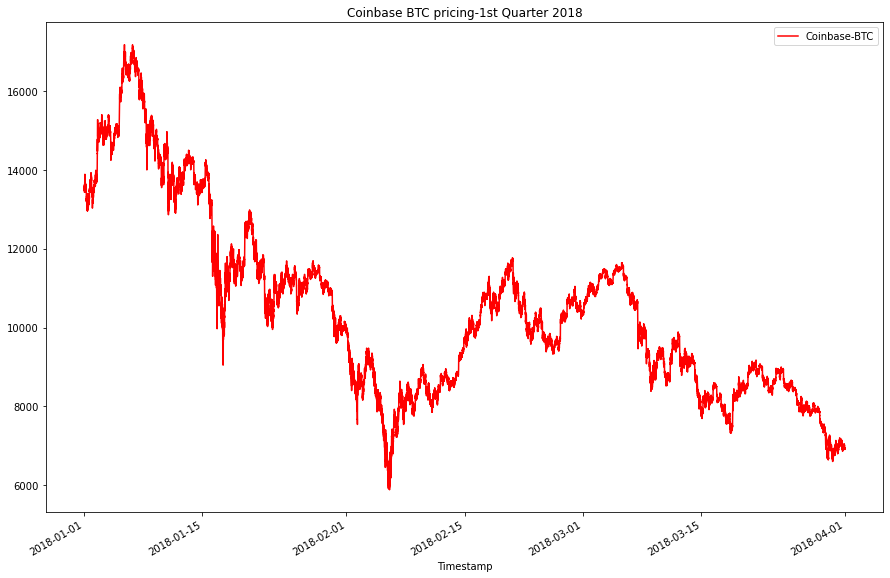

In [20]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
coinbase['Close'].plot(legend=True, figsize=(15, 10), title="Coinbase BTC pricing-1st Quarter 2018", color="red", label="Coinbase-BTC")

<AxesSubplot:title={'center':'Bitstamp BTC pricing v. Coinbase BTC pricing-1st Quarter 2018'}, xlabel='Timestamp'>

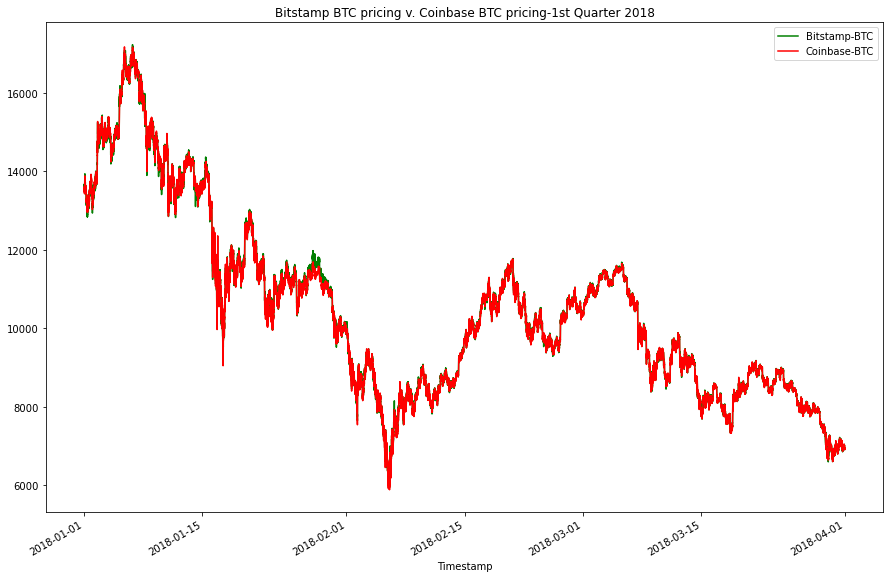

In [21]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full lenth of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp['Close'].plot(legend=True, figsize=(15, 10), title="Bitstamp BTC pricing v. Coinbase BTC pricing-1st Quarter 2018", color="green", label="Bitstamp-BTC")
coinbase['Close'].plot(legend=True, figsize=(15, 10), color="red", label="Coinbase-BTC")


<AxesSubplot:title={'center':'Bitstamp BTC pricing v. Coinbase BTC pricing-January 2018'}, xlabel='Timestamp'>

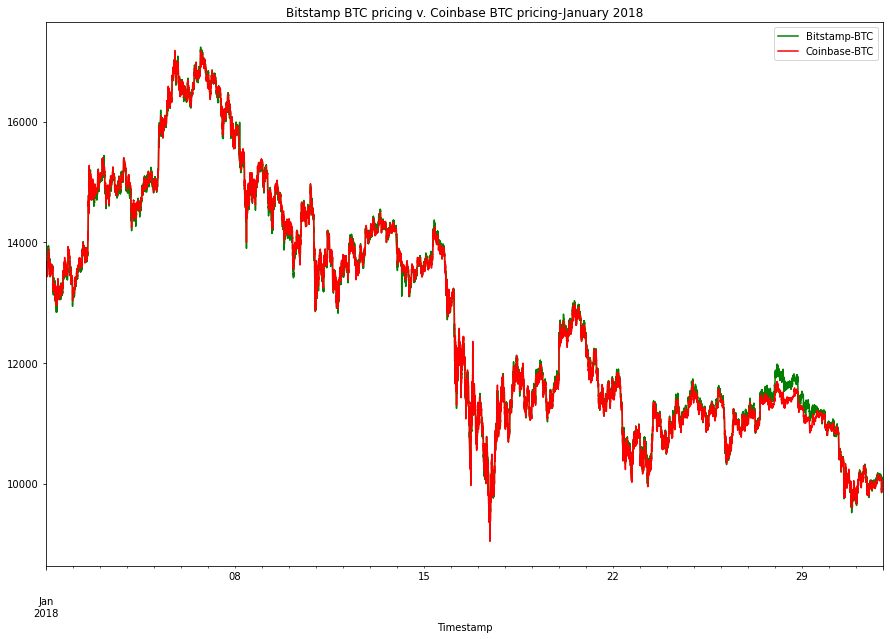

In [22]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp['Close'].loc['2018-01-01' : '2018-01-31'].plot(legend=True, figsize=(15, 10), title="Bitstamp BTC pricing v. Coinbase BTC pricing-January 2018", color="green", label="Bitstamp-BTC")
coinbase['Close'].loc['2018-01-01' : '2018-01-31'].plot(legend=True, figsize=(15, 10), color="red", label="Coinbase-BTC")
                                 
                                 
                                 

<AxesSubplot:title={'center':'Bitstamp BTC pricing v. Coinbase BTC pricing-February 2018'}, xlabel='Timestamp'>

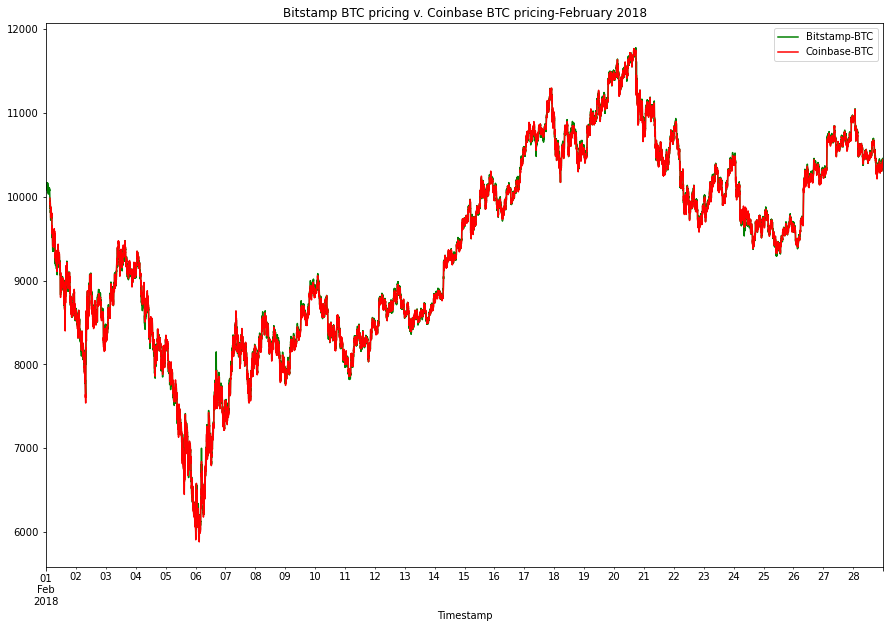

In [23]:
bitstamp['Close'].loc['2018-02-01' : '2018-02-28'].plot(legend=True, figsize=(15, 10), title="Bitstamp BTC pricing v. Coinbase BTC pricing-February 2018", color="green", label="Bitstamp-BTC")
coinbase['Close'].loc['2018-02-01' : '2018-02-28'].plot(legend=True, figsize=(15, 10), color="red", label="Coinbase-BTC")

<AxesSubplot:title={'center':'Bitstamp BTC pricing v. Coinbase BTC pricing-March 2018'}, xlabel='Timestamp'>

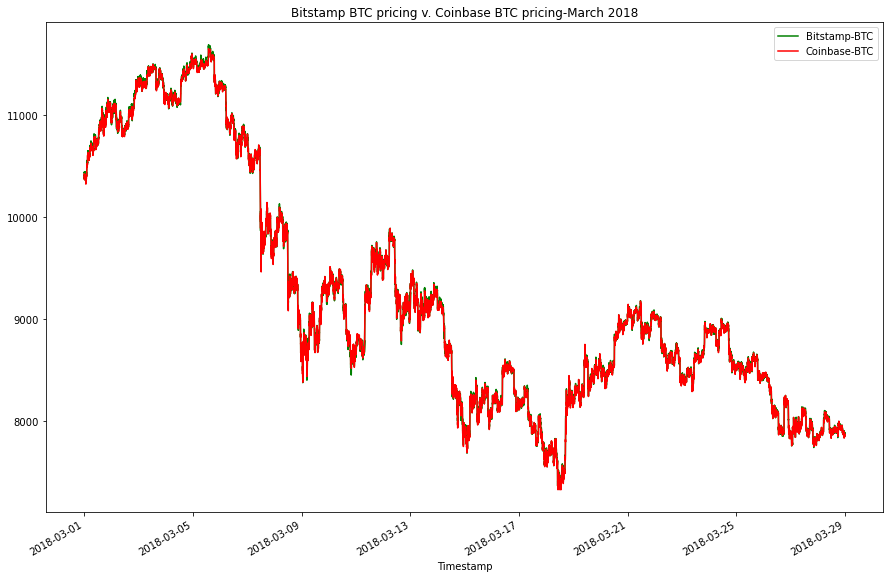

In [24]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 
bitstamp['Close'].loc['2018-03-01' : '2018-03-28'].plot(legend=[1], figsize=(15, 10), title="Bitstamp BTC pricing v. Coinbase BTC pricing-March 2018", color="green", label="Bitstamp-BTC")
coinbase['Close'].loc['2018-03-01' : '2018-03-28'].plot(legend=[1], figsize=(15, 10), color="red", label="Coinbase-BTC")

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** YOUR ANSWER HERE

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the later part of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

--------------------------------

It is apparant that the fluctuations are more frequent as well as sizeable in the beginning on 2018's first quarter. The 'opportunities' certainluy diminish as the 1st quarter gets closer to its end.


<AxesSubplot:title={'center':'Bitstamp BTC pricing v. Coinbase BTC pricing January 28th 2018'}, xlabel='Timestamp'>

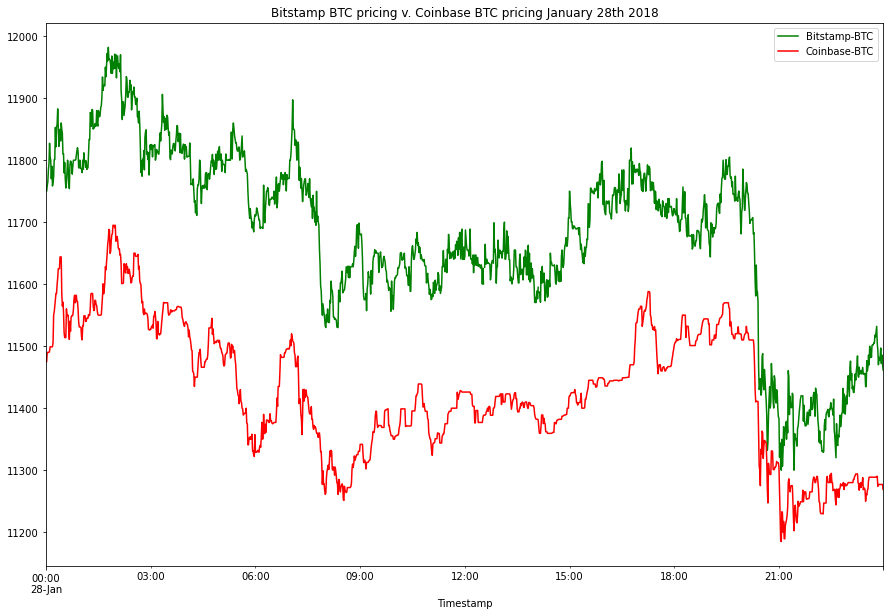

In [25]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp['Close'].loc['2018-01-28'].plot(legend=True, figsize=(15, 10), title="Bitstamp BTC pricing v. Coinbase BTC pricing January 28th 2018", color="green", label="Bitstamp-BTC")
coinbase['Close'].loc['2018-01-28'].plot(legend=True, figsize=(15, 10), color="red", label="Coinbase-BTC")



In [26]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_early = bitstamp['Close'].loc['2018-01-28'] - coinbase['Close'].loc['2018-01-28']
arbitrage_spread_early

Timestamp
2018-01-28 00:00:00    275.38
2018-01-28 00:01:00    275.00
2018-01-28 00:02:00    268.77
2018-01-28 00:03:00    275.03
2018-01-28 00:04:00    294.26
                        ...  
2018-01-28 23:55:00    220.10
2018-01-28 23:56:00    195.11
2018-01-28 23:57:00    208.74
2018-01-28 23:58:00    195.12
2018-01-28 23:59:00    192.63
Name: Close, Length: 1440, dtype: float64

In [27]:
arbitrage_spread_early.describe()

count    1436.000000
mean      247.552326
std        68.343472
min        55.030000
25%       210.022500
50%       251.180000
75%       290.925000
max       439.010000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'January 28th Arbitrage Spread'}>

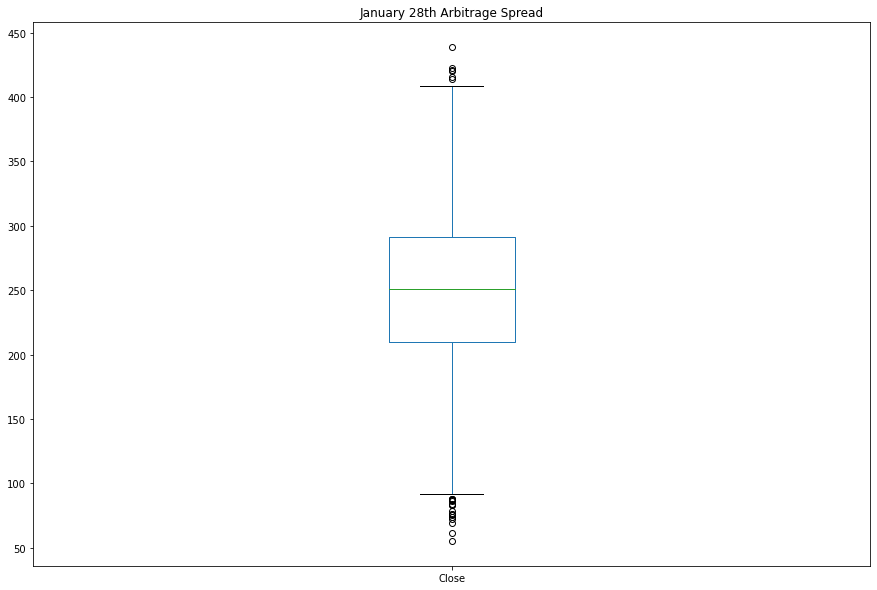

In [28]:
# Visualize the arbitrage spread from early in the dataset in a box plot
arbitrage_spread_early.plot(kind='box',
                           figsize=(15,10),
                            title=('January 28th Arbitrage Spread')
                           )

<AxesSubplot:title={'center':'Bitstamp BTC pricing v. Coinbase BTC pricing February 9th 2018'}, xlabel='Timestamp'>

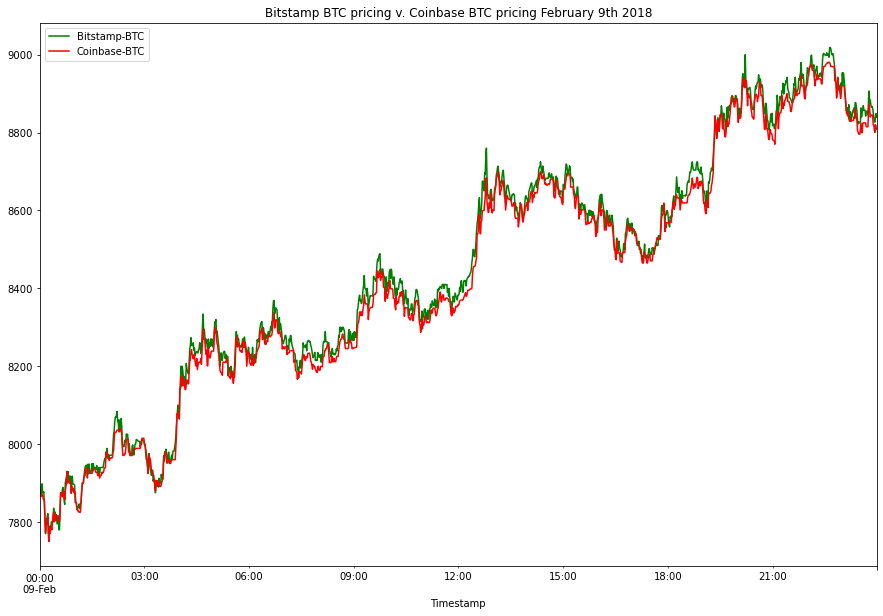

In [29]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp['Close'].loc['2018-02-09'].plot(legend=True, figsize=(15, 10), title="Bitstamp BTC pricing v. Coinbase BTC pricing February 9th 2018", color="green", label="Bitstamp-BTC")
coinbase['Close'].loc['2018-02-09'].plot(legend=True, figsize=(15, 10), color="red", label="Coinbase-BTC")


In [30]:
# Using the date in the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_middle = bitstamp['Close'].loc['2018-02-09'] - coinbase['Close'].loc['2018-02-09']
arbitrage_spread_middle

Timestamp
2018-02-09 00:00:00     7.17
2018-02-09 00:01:00    -0.59
2018-02-09 00:02:00    14.85
2018-02-09 00:03:00     1.09
2018-02-09 00:04:00    28.05
                       ...  
2018-02-09 23:55:00    23.86
2018-02-09 23:56:00    26.15
2018-02-09 23:57:00    20.28
2018-02-09 23:58:00    37.46
2018-02-09 23:59:00    31.20
Name: Close, Length: 1440, dtype: float64

In [31]:
arbitrage_spread_middle.describe()

count    1440.000000
mean       19.772035
std        15.161605
min       -26.210000
25%         9.547500
50%        20.000000
75%        29.742500
max        77.610000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'February 9th Arbitrage Spread'}>

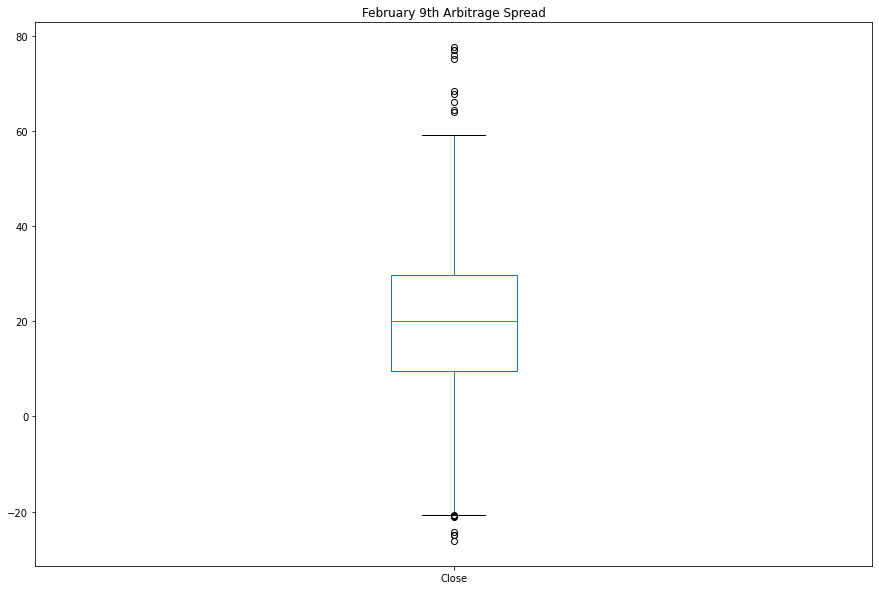

In [32]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
arbitrage_spread_middle.plot(kind='box',
                           figsize=(15,10),
                            title=('February 9th Arbitrage Spread')
                           )

<AxesSubplot:title={'center':'Bitstamp BTC pricing v. Coinbase BTC pricing March 20th 2018'}, xlabel='Timestamp'>

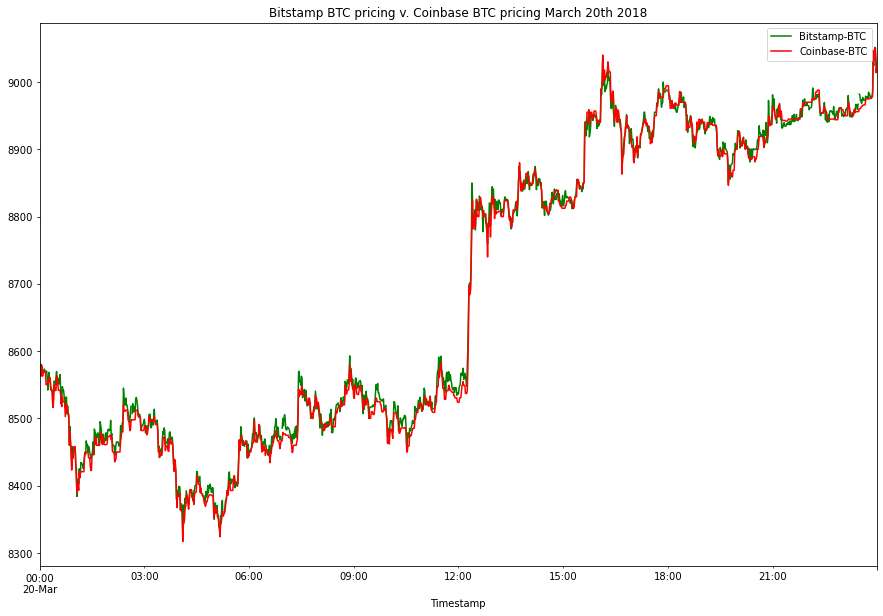

In [33]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp['Close'].loc['2018-03-20'].plot(legend=True, figsize=(15, 10), title="Bitstamp BTC pricing v. Coinbase BTC pricing March 20th 2018", color="green", label="Bitstamp-BTC")
coinbase['Close'].loc['2018-03-20'].plot(legend=True, figsize=(15, 10), color="red", label="Coinbase-BTC")

In [34]:
# Using the date from the late that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_late = bitstamp['Close'].loc['2018-03-20'] - coinbase['Close'].loc['2018-03-20']
arbitrage_spread_late

Timestamp
2018-03-20 00:00:00   -10.82
2018-03-20 00:01:00    -1.30
2018-03-20 00:02:00    12.00
2018-03-20 00:03:00    16.78
2018-03-20 00:04:00    -4.82
                       ...  
2018-03-20 23:55:00    11.14
2018-03-20 23:56:00     1.67
2018-03-20 23:57:00   -11.31
2018-03-20 23:58:00    16.74
2018-03-20 23:59:00     0.83
Name: Close, Length: 1440, dtype: float64

In [35]:
arbitrage_spread_late.describe()

count    1432.000000
mean        4.572556
std         9.269393
min       -27.930000
25%        -1.477500
50%         4.825000
75%        10.962500
max        59.950000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'March 20th Arbitrage Spread'}>

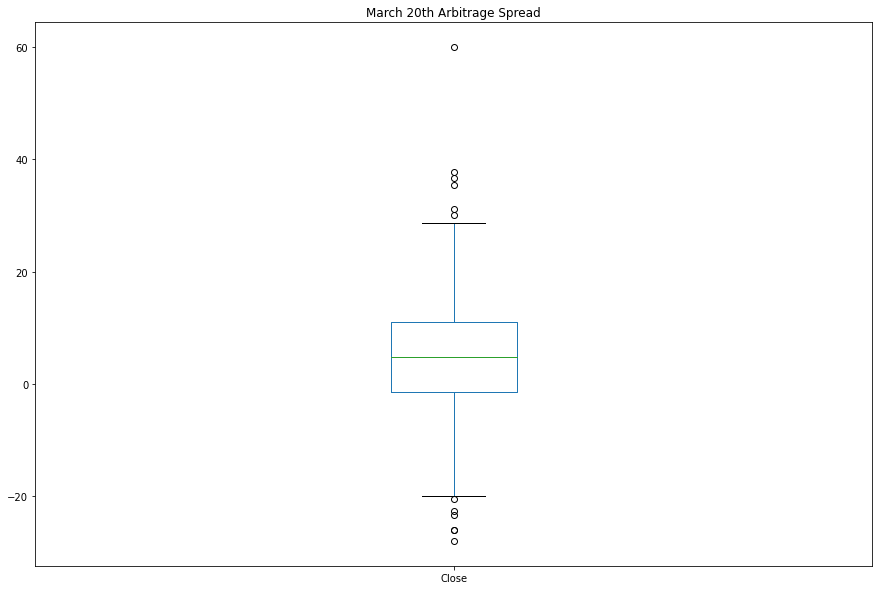

In [36]:
# Visualize the arbitrage spread from late in the dataset in a box plot
arbitrage_spread_late.plot(kind='box',
                           figsize=(15,10),
                            title=('March 20th Arbitrage Spread')
                           )

### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

*NOTE*: For illustration, only one of the three dates is shown in the starter code below.

In [37]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_early = bitstamp['Close'].loc['2018-01-28'] - coinbase['Close'].loc['2018-01-28']

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
arbitrage_spread_early.describe()

count    1436.000000
mean      247.552326
std        68.343472
min        55.030000
25%       210.022500
50%       251.180000
75%       290.925000
max       439.010000
Name: Close, dtype: float64

In [38]:
arbitrage_spread_middle = bitstamp['Close'].loc['2018-02-09'] - coinbase['Close'].loc['2018-02-09']
arbitrage_spread_middle.describe()

count    1440.000000
mean       19.772035
std        15.161605
min       -26.210000
25%         9.547500
50%        20.000000
75%        29.742500
max        77.610000
Name: Close, dtype: float64

In [39]:
arbitrage_spread_late = bitstamp['Close'].loc['2018-03-20'] - coinbase['Close'].loc['2018-03-20']
arbitrage_spread_late.describe()

count    1432.000000
mean        4.572556
std         9.269393
min       -27.930000
25%        -1.477500
50%         4.825000
75%        10.962500
max        59.950000
Name: Close, dtype: float64

#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [40]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_early = arbitrage_spread_early[arbitrage_spread_early>0] / coinbase['Close'].loc['2018-01-28']

# Review the spread return DataFrame
spread_return_early.describe()

count    1436.000000
mean        0.021648
std         0.005961
min         0.004885
25%         0.018369
50%         0.021897
75%         0.025292
max         0.038510
Name: Close, dtype: float64

In [41]:
spread_return_middle = arbitrage_spread_middle[arbitrage_spread_middle>0] / coinbase['Close'].loc['2018-02-09']
spread_return_middle.describe()

count    1315.000000
mean        0.002642
std         0.001532
min         0.000001
25%         0.001526
50%         0.002530
75%         0.003575
max         0.008951
Name: Close, dtype: float64

In [42]:
spread_return_late = arbitrage_spread_late[arbitrage_spread_late>0] / coinbase['Close'].loc['2018-03-20']
spread_return_late.describe()

count    980.000000
mean       0.001080
std        0.000772
min        0.000001
25%        0.000486
50%        0.000984
75%        0.001547
max        0.006820
Name: Close, dtype: float64

#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [43]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_early = spread_return_early[spread_return_early > .01]
profitable_trades_early.head()

Timestamp
2018-01-28 00:00:00    0.023999
2018-01-28 00:01:00    0.023965
2018-01-28 00:02:00    0.023392
2018-01-28 00:03:00    0.023936
2018-01-28 00:04:00    0.025610
Name: Close, dtype: float64

In [44]:
profitable_trades_middle = spread_return_middle[spread_return_middle > .001]
profitable_trades_middle.head()

Timestamp
2018-02-09 00:02:00    0.001888
2018-02-09 00:04:00    0.003564
2018-02-09 00:05:00    0.001001
2018-02-09 00:06:00    0.001802
2018-02-09 00:07:00    0.002604
Name: Close, dtype: float64

In [45]:
profitable_trades_late = spread_return_late[spread_return_late > .001]
profitable_trades_late.head()

Timestamp
2018-03-20 00:02:00    0.001401
2018-03-20 00:03:00    0.001960
2018-03-20 00:11:00    0.002372
2018-03-20 00:12:00    0.002229
2018-03-20 00:13:00    0.001033
Name: Close, dtype: float64

#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [46]:
profitable_trades_early.describe()

count    1378.000000
mean        0.022201
std         0.005421
min         0.010087
25%         0.019016
50%         0.022191
75%         0.025413
max         0.038510
Name: Close, dtype: float64

In [47]:
profitable_trades_middle.describe()

count    1116.000000
mean        0.003020
std         0.001343
min         0.001000
25%         0.001977
50%         0.002847
75%         0.003741
max         0.008951
Name: Close, dtype: float64

In [48]:
profitable_trades_late.describe()

count    484.000000
mean       0.001692
std        0.000615
min        0.001002
25%        0.001241
50%        0.001555
75%        0.001974
max        0.006820
Name: Close, dtype: float64

#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [49]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_early = profitable_trades_early * bitstamp['Close'].loc['2018-01-28']
# Drop any missing values from the profit DataFrame
profit_per_trade_early = profit_early.dropna()

In [50]:
profit_middle = profitable_trades_middle * bitstamp['Close'].loc['2018-02-09']

profit_per_trade_middle = profit_middle.dropna()

In [51]:
profit_late = profitable_trades_late * bitstamp['Close'].loc['2018-03-20']

profit_per_trade_late = profit_late.dropna()

#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [52]:
# Generate the summary statistics for the early profit per trade DataFrame
profit_per_trade_early.describe()

count    1378.000000
mean      259.905405
std        64.817688
min       115.121956
25%       221.411421
50%       259.796909
75%       300.417942
max       455.916136
Name: Close, dtype: float64

In [53]:
profit_per_trade_middle.describe()

count    1116.000000
mean       25.653407
std        11.579020
min         7.847867
25%        16.905197
50%        24.048630
75%        32.048844
max        78.285078
Name: Close, dtype: float64

In [54]:
profit_per_trade_late.describe()

count    484.000000
mean      14.558858
std        5.304745
min        8.528600
25%       10.890741
50%       13.235653
75%       16.811778
max       60.358872
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Profits'}, xlabel='Timestamp'>

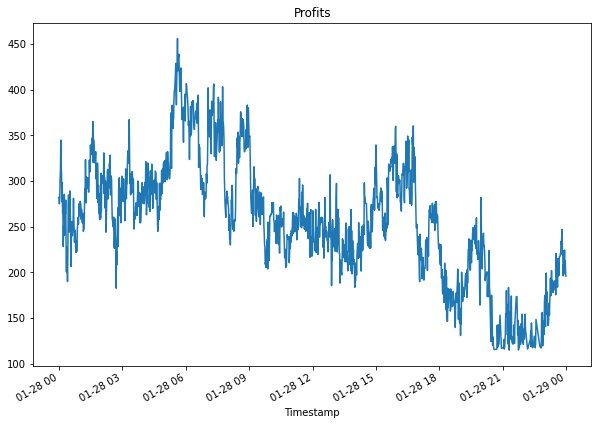

In [55]:
# Plot the results for the early profit per trade DataFrame
profit_per_trade_early.plot(figsize=(10, 7),title="Profits")

#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [56]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
profit_per_trade_early.sum

<bound method Series.sum of Timestamp
2018-01-28 00:00:00    281.988859
2018-01-28 00:01:00    281.590414
2018-01-28 00:02:00    275.056978
2018-01-28 00:03:00    281.613252
2018-01-28 00:04:00    301.796040
                          ...    
2018-01-28 23:55:00    224.395832
2018-01-28 23:56:00    198.485719
2018-01-28 23:57:00    212.603835
2018-01-28 23:58:00    198.496065
2018-01-28 23:59:00    195.922778
Name: Close, Length: 1378, dtype: float64>

#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

<AxesSubplot:title={'center':'Cumulative Bitcoin Profits'}, xlabel='Timestamp'>

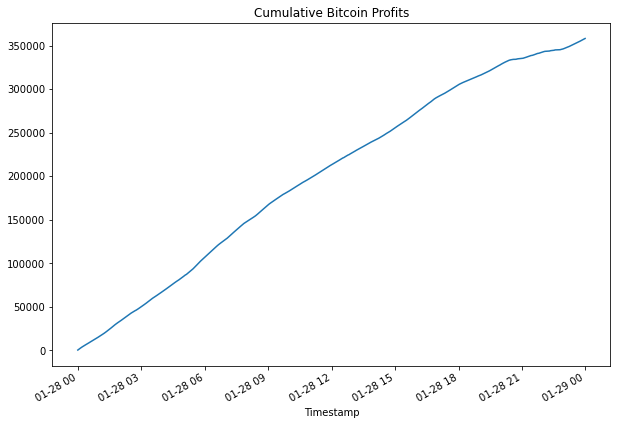

In [57]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit = profit_per_trade_early.cumsum()
cumulative_profit.plot(figsize=(10, 7), title="Cumulative Bitcoin Profits")

<AxesSubplot:title={'center':'Cumulative Bitcoin Profits'}, xlabel='Timestamp'>

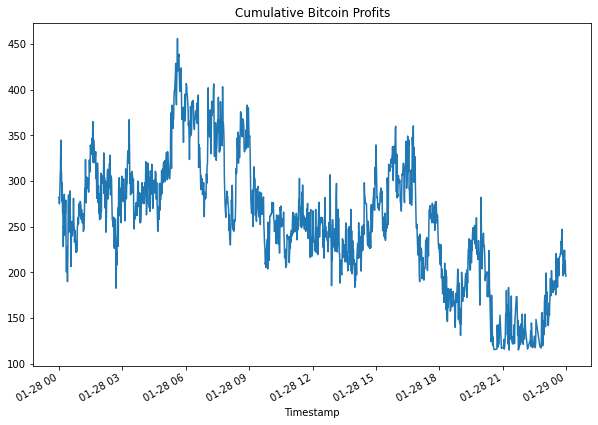

In [58]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
profit_per_trade_early.plot(figsize=(10, 7), title="Cumulative Bitcoin Profits")

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** The trend definitly shows the opportunity for profits through arbitage was more prominent in the early part of 2018's 1st quarter and dissipated as the quarter went on.